# Previous Neoproterozoic data

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
from matplotlib import lines as mlines
import cartopy.crs as ccrs

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Shaat dike results (this study)

These results for the Shaat dikes are taken from the `dike_paleomagnetism.ipynb` notebook.

In [2]:
Mirbat_area_lon = 54.9426
Mirbat_area_lat = 17.1110

SD_sites_Leger_all_mag_tc_unified_mean = {
 'dec': 80.52866634947969,
 'inc': 56.50917840923085,
 'n': 51,
 'r': 50.49078295705074,
 'k': 98.18995788203064,
 'alpha95': 2.022132960432982,
 'csd': 8.17431711984566
 }

mean_Shaat_pole_all = {
 'dec': 110.10066413380076,
 'inc': 17.781698145989594,
 'n': 51,
 'r': 50.23189318665254,
 'k': 65.09511324616017,
 'alpha95': 2.4899863577512873,
 'csd': 10.03947090475656}

Shaat_all_pole_paleolat = 37.5

## Kilner et al. (2005) data

Data developed predominantly from ca. 635 Ma strata in northern Oman were interpreted to constrain a low-latitude position Kilner et al. (2005). These data imply an orientation of Oman similar to present-day (and the Cretaceous), in contrast to the rotated orientation revealed by the ca. 726 Ma pole. This orientation implies an unlikely vertical axis rotation of ~87º from 726 to 635 and back again by 550 Ma to be in position for Gondwana assembly. Moreover, Rowan and Tait (2010) developed additional paleomagnetic that showed the magnetization underlying the Kilner et al. (2005) pole to fail a fold test indicating that it is likely a Cretaceous overprint. 

Kilner et al. paleopole:
> paleopole at 52.38S, 074.48E (N 5 25 sites;a95 5 7.38).

In [3]:
Kilner_plat = -52.38
Kilner_plon = 74.48
Kilner_A95 = 7.3
Kilner_pole_Mirbat_dec, Kilner_pole_Mirbat_inc = pmag.vgp_di(Kilner_plat,Kilner_plon,Mirbat_area_lat,Mirbat_area_lon)
Kilner_dec_difference = Kilner_pole_Mirbat_dec - SD_sites_Leger_all_mag_tc_unified_mean['dec']

print('The difference in declination between the Shaat dikes and Kilner pole is: ' + str(round(Kilner_dec_difference,0)))

The difference in declination between the Shaat dikes and Kilner pole is: 87.0


## Kempf et al. (2000) data

Sparse paleomagnetic data from 10 specimens of the Cryogenian Ayn Formation developed by Kempf et al. (2000) near our conglomerate test locality yielded a hematite-held direction with a similar declination to the Shaat dikes. The inclination is substantially shallower indicating a paleolatitude of 9º. If a range of inclination shallowing values is applied (using the compilation from Pierce et al., 2022; see analysis below), the range of resulting paleolatitude is: 10 to 22º.

From Kempf et al. (2000):

> Two sites (10 samples) revealed a consistent magnetic component above 500³C. The sample mean declination of 68.4º and inclination of 18.4º (k =46.4, K95 =7.2º)

Table 2 reports pole of plon 141.8; plat 23.3; dp 3.9; dm 7.5

In [4]:
Kempf_plat = 23.3
Kempf_plon = 141.8
Kempf_A95 = np.sqrt(3.9*7.5)

Kempf_dec = 68.4
Kempf_inc = 18.4
Kempf_dir_a95 = 7.2

We can verify that the calculation of the pole from the directional data was correctly done in Kilner (it was):

In [5]:
pmag.dia_vgp(Kempf_dec, Kempf_inc, Kempf_dir_a95, Mirbat_area_lat, Mirbat_area_lon)

(141.82418524187435, 23.286964222958563, 3.890738281237288, 7.4850939372740655)

In [6]:
Kempf_inc_0_6 = ipmag.unsquish(incs=Kempf_inc,f=0.6)
Kempf_paleolat = ipmag.lat_from_inc(Kempf_inc)
Kempf_paleolat_0_6 = ipmag.lat_from_inc(Kempf_inc_0_6)
print('The paleolatitude of the Kempf pole is: ' + str(round(Kempf_paleolat,1)))
print('The paleolatitude of the Kempf pole at f=0.6 is: ' + str(round(Kempf_paleolat_0_6,1)))

The paleolatitude of the Kempf pole is: 9.4
The paleolatitude of the Kempf pole at f=0.6 is: 15.5


In [7]:
paleolat_difference = Shaat_all_pole_paleolat-Kempf_paleolat
paleolat_difference_0_6 = Shaat_all_pole_paleolat-Kempf_paleolat_0_6
print('The difference in paleolatitude between the Shaat dikes and Kempf pole (with f=0.6 inclination correction) is: ' + str(round(paleolat_difference_0_6,1)))
print('The difference in paleolatitude between the Shaat dikes and Kempf pole (with no inclination correction) is: ' + str(round(paleolat_difference,1)))

The difference in paleolatitude between the Shaat dikes and Kempf pole (with f=0.6 inclination correction) is: 22.0
The difference in paleolatitude between the Shaat dikes and Kempf pole (with no inclination correction) is: 28.1


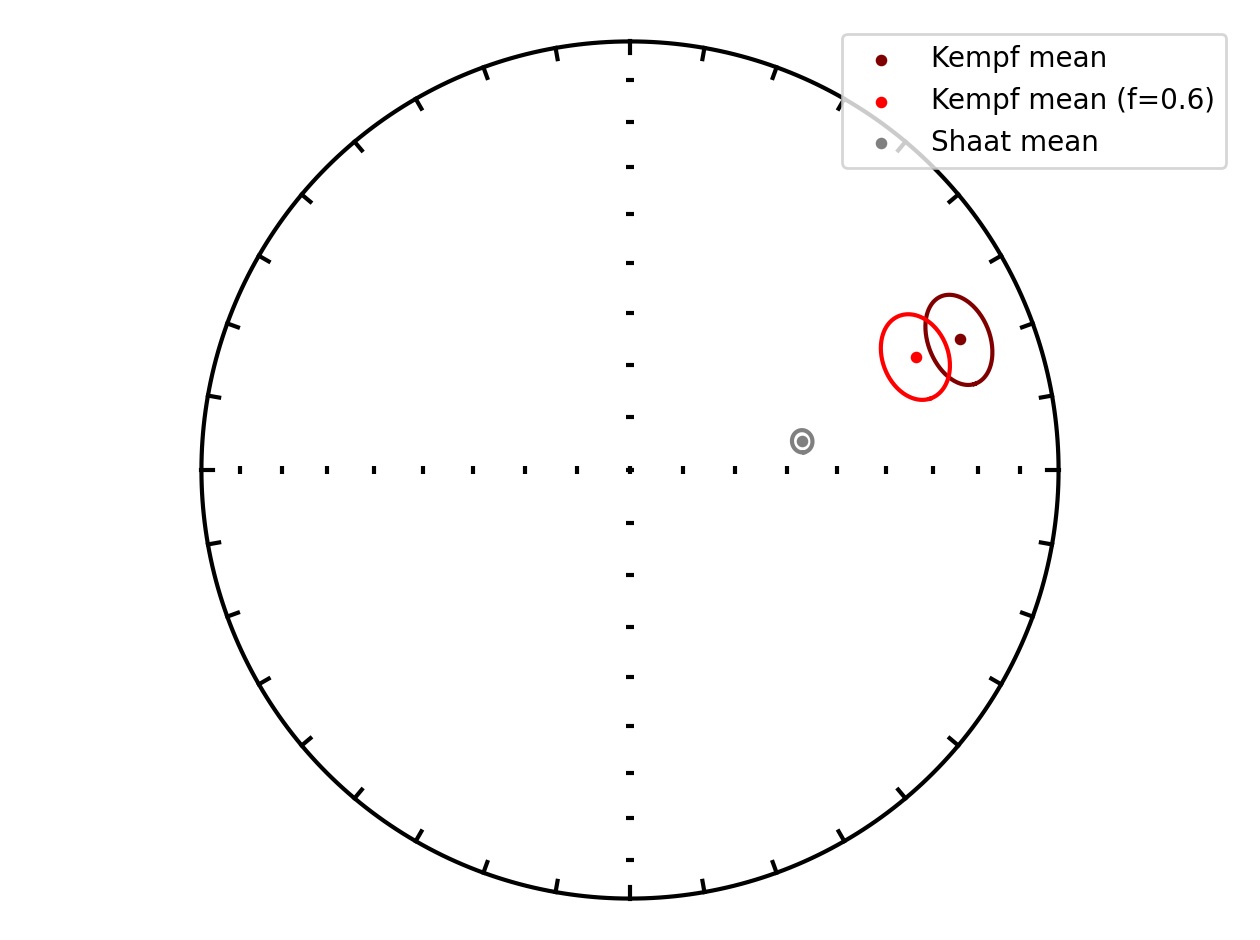

In [8]:
Shaat_mean = SD_sites_Leger_all_mag_tc_unified_mean

ipmag.plot_net()
ipmag.plot_di_mean(Kempf_dec, Kempf_inc, Kempf_dir_a95, color='maroon', marker='o', markersize=10, label='Kempf mean')
ipmag.plot_di_mean(Kempf_dec, Kempf_inc_0_6, Kempf_dir_a95, color='red', marker='o', markersize=10, label='Kempf mean (f=0.6)')

ipmag.plot_di_mean(Shaat_mean['dec'], Shaat_mean['inc'], Shaat_mean['alpha95'], color='grey', marker='o', 
                   markersize=10, label='Shaat mean')
plt.legend()
plt.show()

In [9]:
Kempf_f_0_6_pole = pmag.dia_vgp(Kempf_dec, Kempf_inc_0_6, Kempf_dir_a95, Mirbat_area_lat, Mirbat_area_lon)
print('Plong: ' + str(round(Kempf_f_0_6_pole[0],1)))
print('Plat: ' + str(round(Kempf_f_0_6_pole[1],1)))
print('dp: ' + str(round(Kempf_f_0_6_pole[2],1)))
print('dm: ' + str(round(Kempf_f_0_6_pole[3],1)))
print('approximate A95: ' + str(round(np.sqrt(Kempf_f_0_6_pole[2]*Kempf_f_0_6_pole[3]),1)))

Plong: 135.4
Plat: 24.7
dp: 4.4
dm: 7.9
approximate A95: 5.9


Plon: 135.2  Plat: 24.7
Major axis lon: 40.3  Major axis lat: 10.6
Minor axis lon: 288.9  Minor axis lat: 62.8
Major axis angle of 95% ellipse (Zeta): 9.6
Minor axis angle of 95% ellipse (Eta): 5.5
Number of directions in mean (n): 70000


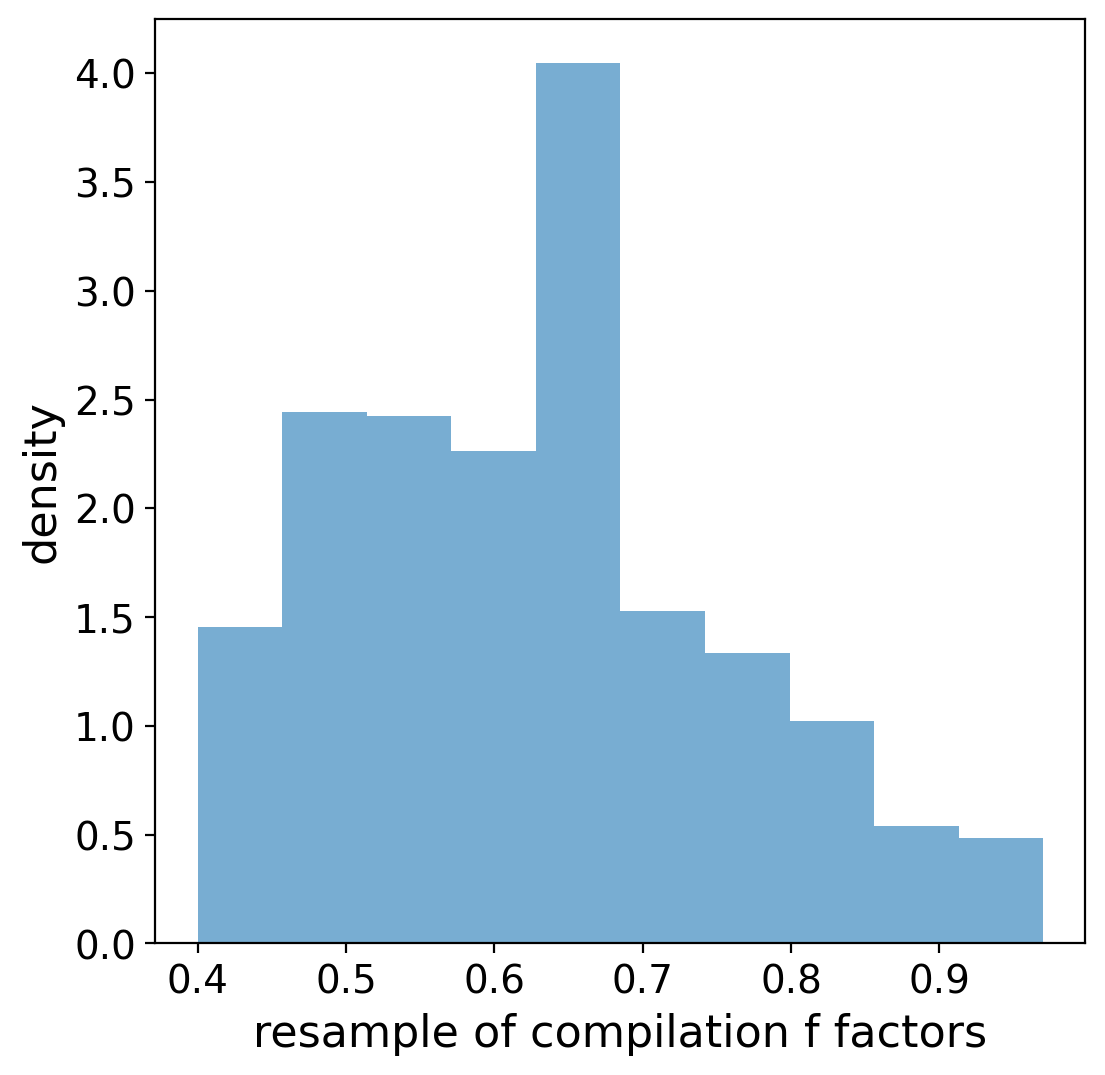

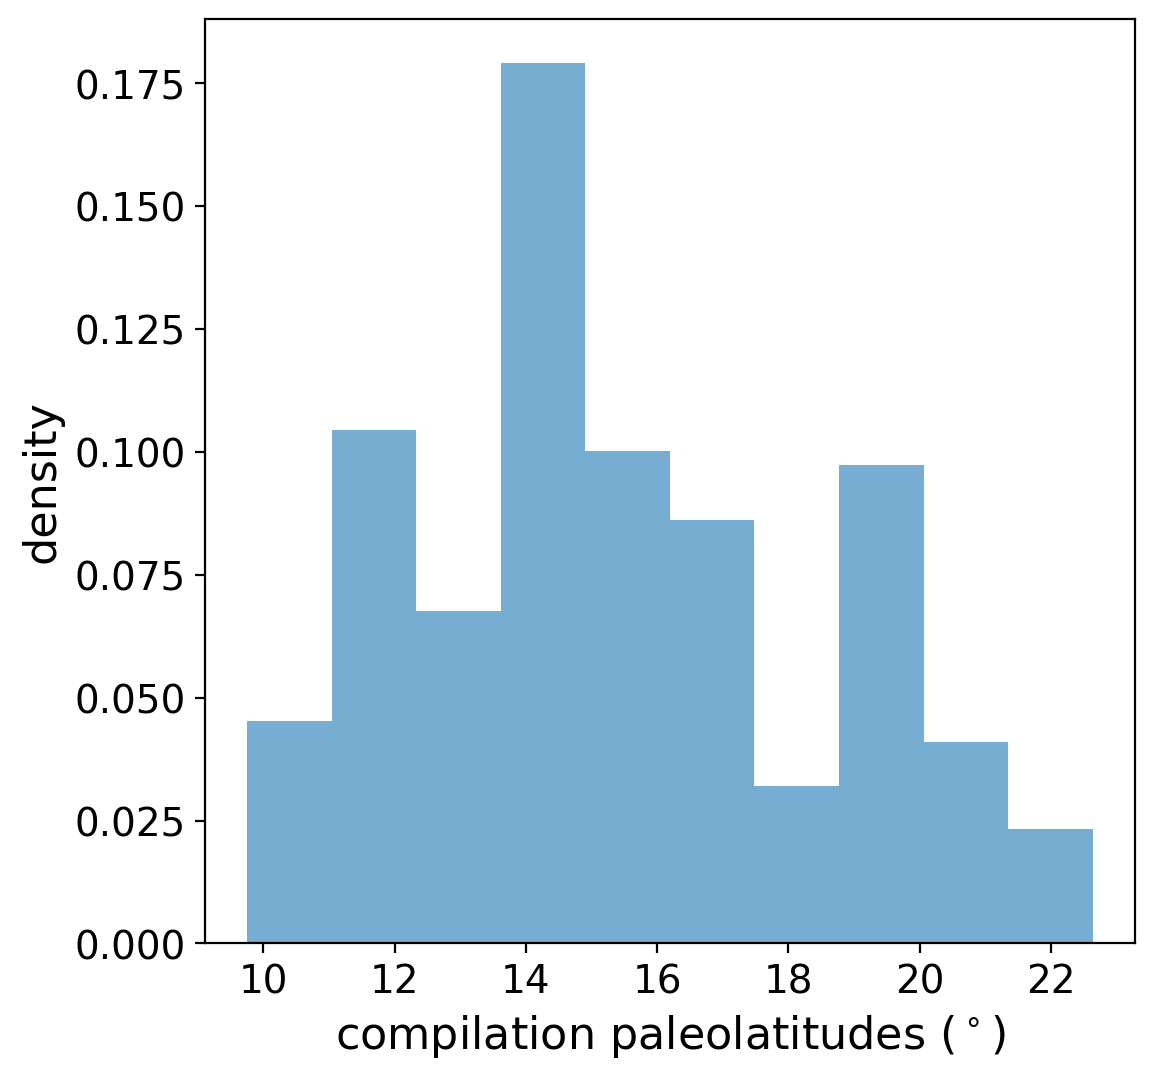

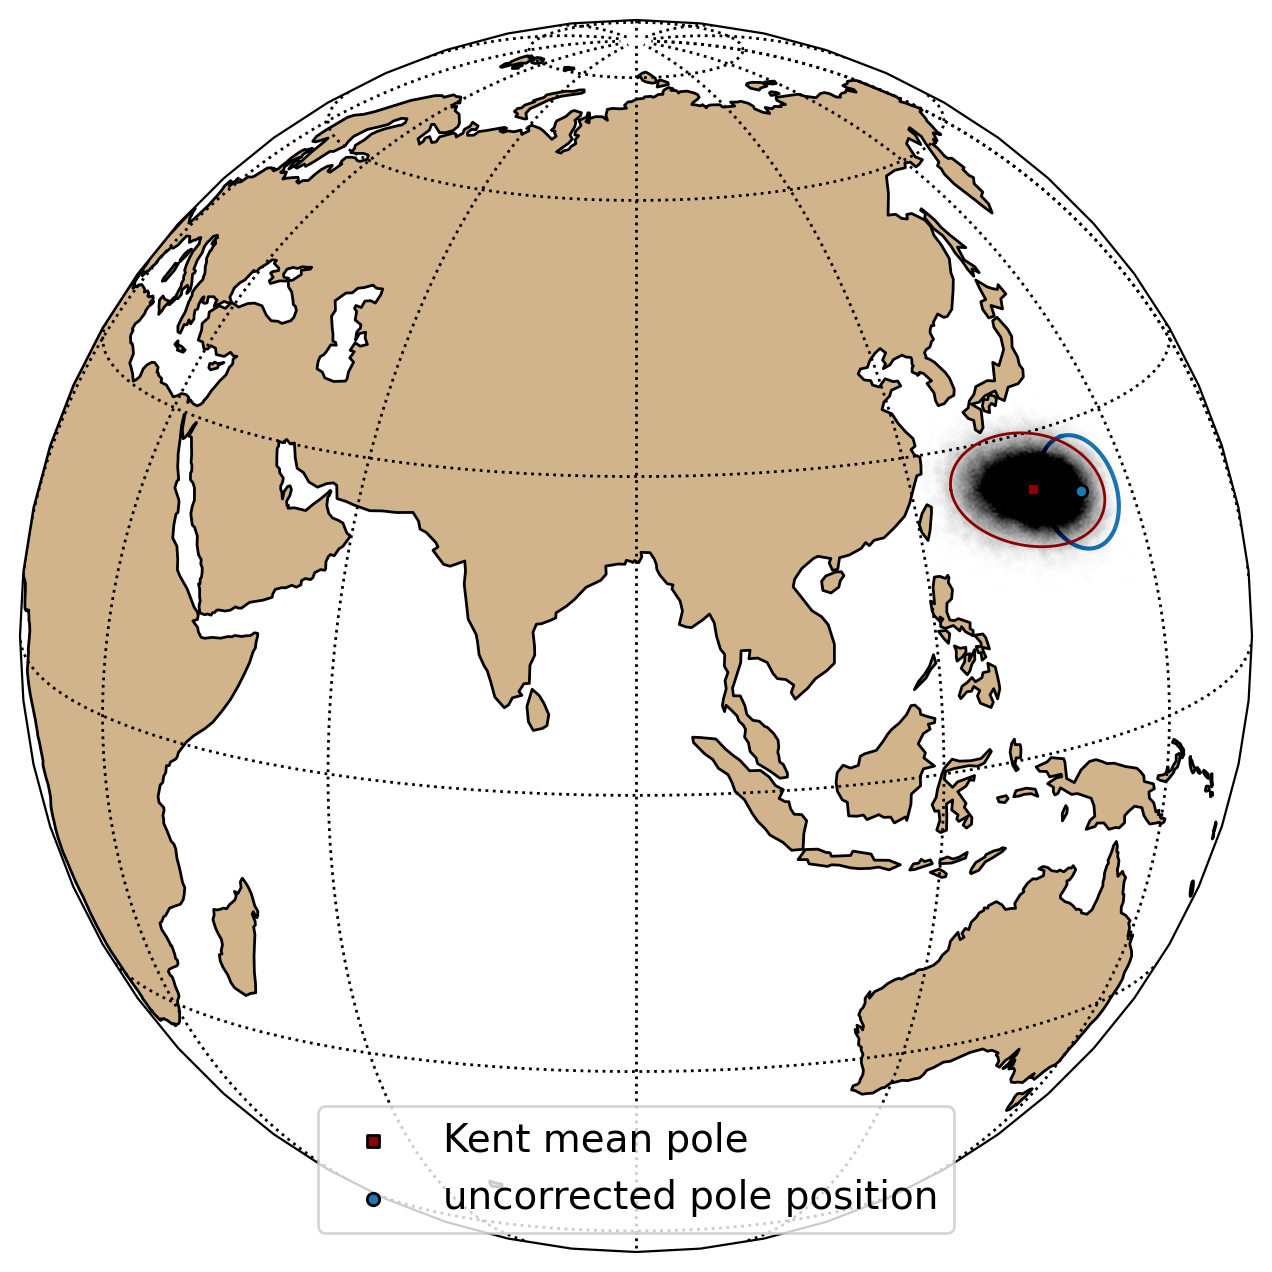

In [10]:
Kempf_pole_kent, paleolatitudes = ipmag.find_compilation_kent(Kempf_plon, Kempf_plat, Kempf_A95, 
                                        Mirbat_area_lon, Mirbat_area_lat,
                                        map_central_longitude=90, map_central_latitude=15
                                        ,n=10000,n_fish=1000,return_poles=False,return_paleolats=True)

In [11]:
np.percentile(paleolatitudes, [2.5, 97.5])

array([10.060591107930794, 21.656910264253373])

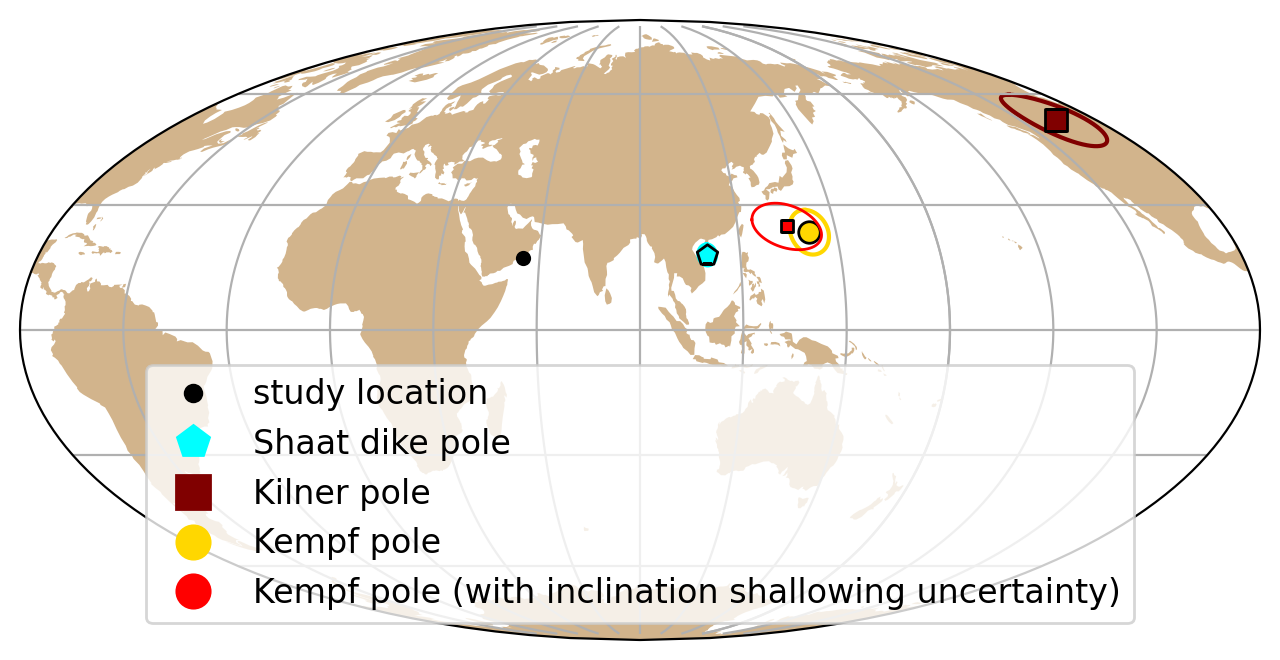

In [12]:
map_axis = ipmag.make_mollweide_map(central_longitude=90,
                                       figsize=(8,8),land_edge_color=None)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon+180, -Kilner_plat, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon, Kempf_plat, Kempf_A95, 
                marker='o',color='gold', markersize=60)
ipmag.plot_pole_ellipse(map_axis,Kempf_pole_kent, color='r')
ipmag.plot_vgp(map_axis, Mirbat_area_lon, Mirbat_area_lat)

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole')
kempf_pole = mlines.Line2D([], [], color='gold', marker='o', linestyle='None', markersize=12, label='Kempf pole')
kempf_pole_ellipse = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=12, label='Kempf pole (with inclination shallowing uncertainty)')
study_location = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='study location')

# Add the legend to the plot
plt.legend(handles=[study_location,mean_pole, kilner_pole, kempf_pole, kempf_pole_ellipse], loc='lower center', fontsize=12)

plt.show()


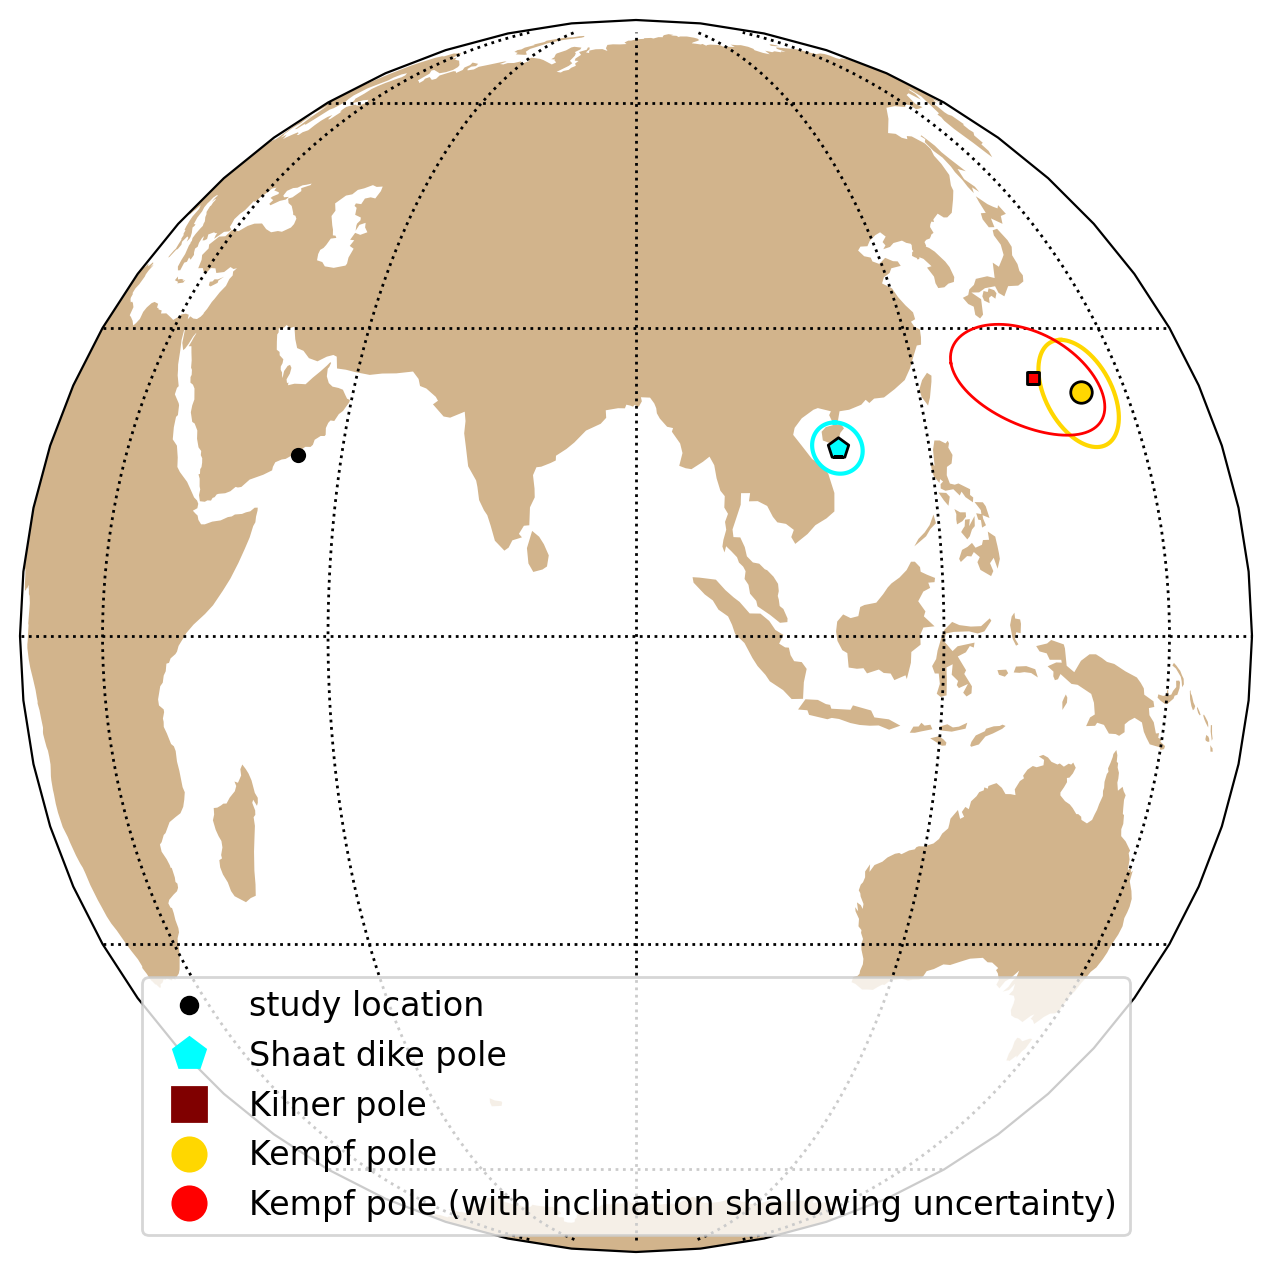

In [13]:
map_axis = ipmag.make_orthographic_map(central_longitude=90,
                                       figsize=(8,8),land_edge_color=None)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon+180, -Kilner_plat, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon, Kempf_plat, Kempf_A95, 
                marker='o',color='gold', markersize=60)
ipmag.plot_pole_ellipse(map_axis,Kempf_pole_kent, color='r')
ipmag.plot_vgp(map_axis, Mirbat_area_lon, Mirbat_area_lat)

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole')
kempf_pole = mlines.Line2D([], [], color='gold', marker='o', linestyle='None', markersize=12, label='Kempf pole')
kempf_pole_ellipse = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=12, label='Kempf pole (with inclination shallowing uncertainty)')
study_location = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='study location')

# Add the legend to the plot
plt.legend(handles=[study_location,mean_pole, kilner_pole, kempf_pole, kempf_pole_ellipse], loc='lower center', fontsize=12)

plt.show()

## Compare poles to APWP

Need to rotate poles into South Africa coordinates for comparison to Gondwana poles

From Table 6 of Torsvik et al. 2012. Relative fit between Arabia and South Africa
| Lat | Lon | Angle |
|-----|-----|-------| 
|37.1 |17.2 |−8.9   |

In [14]:
Shaat_plon = mean_Shaat_pole_all['dec']
Shaat_plat = mean_Shaat_pole_all['inc']


rotated_lat, rotated_lon = pmag.pt_rot([37.1, 17.2, -8.9], 
            [Mirbat_area_lat, Kempf_plat, Kilner_plat, Shaat_plat], 
            [Mirbat_area_lon, Kempf_plon, Kilner_plon, Shaat_plon])

Mirbat_area_lat_rot = rotated_lat[0]
Mirbat_area_lon_rot = rotated_lon[0]

Kempf_plat_rotated = rotated_lat[1]
Kempf_plon_rotated = rotated_lon[1]

Kilner_plat_rotated = rotated_lat[2]
Kilner_plon_rotated = rotated_lon[2]

Shaat_plat_rotated = rotated_lat[3]
Shaat_plon_rotated = rotated_lon[3]
Shaat_A95 = mean_Shaat_pole_all['alpha95']

Reality check of successful rotation by comparing current Mirbat locality and it rotated towards Africa. We can see that it successfully closes the Gulf of Aden in the right direction.

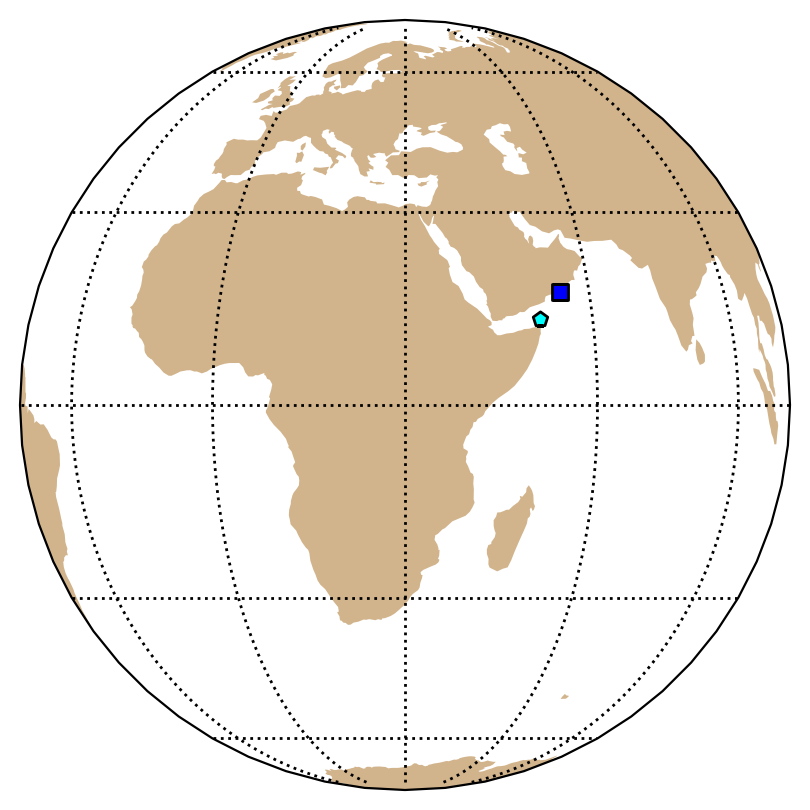

In [15]:
map_axis = ipmag.make_orthographic_map(central_longitude=30,
                                       figsize=(5,5),land_edge_color=None)
ipmag.plot_pole(map_axis, Mirbat_area_lon_rot, Mirbat_area_lat_rot, 0.1, 
                marker='p',color='aqua', markersize=30)
ipmag.plot_pole(map_axis, Mirbat_area_lon, Mirbat_area_lat, 0.1, 
                marker='s',color='blue', markersize=30)

In [16]:
Gondwana_APWP = pd.read_csv('../data/APWP/Torsvik2012a_Gondwana_APWP.csv')
Gondwana_Cambrian_APWP = Gondwana_APWP[(Gondwana_APWP['age'] <= 540) & (Gondwana_APWP['age'] >= 490)]
Gondwana_Cambrian_APWP.reset_index(drop=True, inplace=True)
Gondwana_Cambrian_APWP

,age,N_poles,RM_A95,RM_Plat,RM_Plon,RM_f0_6_A95,RM_f0_6_Plat,RM_f0_6_Plon,Spline_Plat,Spline_Plon,Spline_GCD
0,490,7.0,4.2,32.8,7.8,13.4,30.8,7.9,34.3,12.9,5.5
1,500,10.0,10.7,25.2,6.5,10.7,25.2,6.5,30.7,10.7,6.7
2,510,9.0,7.8,16.9,4.4,7.9,17.0,4.2,19.9,4.0,2.9
3,520,11.0,9.2,13.6,357.8,9.4,13.8,357.1,9.3,351.0,7.5
4,530,7.0,13.5,7.7,347.0,13.8,8.5,344.7,4.2,339.8,6.5
5,540,4.0,30.9,-6.9,332.1,32.4,-3.9,326.8,-1.3,328.6,3.2


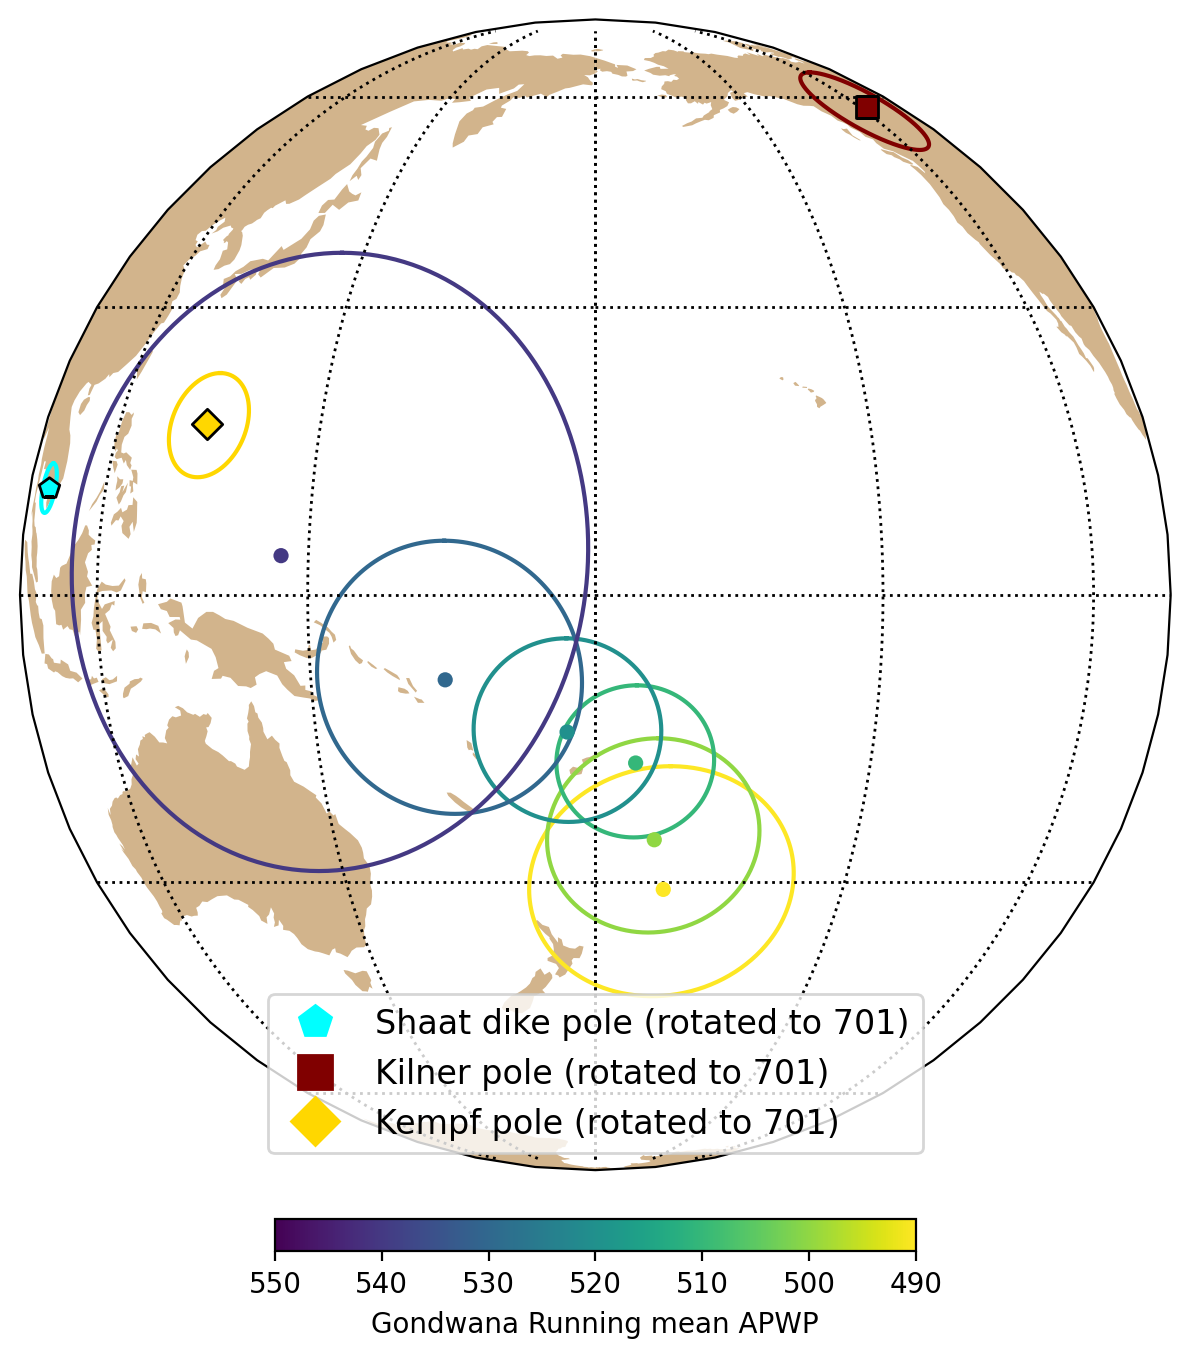

In [17]:
map_axis = ipmag.make_orthographic_map(central_longitude=180,
                                       figsize=(8,8),land_edge_color=None)
ipmag.plot_pole(map_axis, Shaat_plon_rotated, Shaat_plat_rotated, Shaat_A95, 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon_rotated+180, -Kilner_plat_rotated, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon_rotated, Kempf_plat_rotated, Kempf_A95, 
                marker='D',color='gold', markersize=60)

vmin=490
vmax=550
cNorm = colors.Normalize(vmin, vmax)
Gondwana_scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in range(Gondwana_Cambrian_APWP.shape[0]):
    rgba = Gondwana_scalarMap.to_rgba(Gondwana_Cambrian_APWP['age'][n])
    hex_color = colors.rgb2hex(rgba)
    ipmag.plot_pole(map_axis,Gondwana_Cambrian_APWP['RM_f0_6_Plon'][n]+180,
                    -Gondwana_Cambrian_APWP['RM_f0_6_Plat'][n],
                    Gondwana_Cambrian_APWP['RM_f0_6_A95'][n],
                    color=hex_color, markersize=30, edgecolor='none')
    

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole (rotated to 701)')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole (rotated to 701)')
kempf_pole = mlines.Line2D([], [], color='gold', marker='D', linestyle='None', markersize=12, label='Kempf pole (rotated to 701)')

# Add the legend to the plot
plt.legend(handles=[mean_pole, kilner_pole, kempf_pole], loc='lower center', fontsize=12)
cbar=plt.colorbar(Gondwana_scalarMap, orientation='horizontal', fraction=0.026, pad=0.04)
cbar.set_label('Gondwana Running mean APWP')
cbar.ax.invert_xaxis()

plt.show()

In [18]:
Gondwana_Cambrian_poles = pd.read_csv('../data/APWP/Torsvik2012a_Gondwana_poles.csv')
Gondwana_Cambrian_poles = Gondwana_Cambrian_poles.sort_values("Age")
Gondwana_Cambrian_poles = Gondwana_Cambrian_poles[Gondwana_Cambrian_poles["Age"] > 485]
Gondwana_Cambrian_poles.reset_index(drop=True, inplace=True)
Gondwana_Cambrian_poles

,Q,a95,Com.,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,Block
0,3,3.8,NaN,"Black Hill Norite, South Australia",-37.5,34.4,,,15.2,14.8,( 19.5/ 117.8/-56.2),500.0,"2971,TV",AUSTRALIA (801)
1,5,11.0,NaN,Carion Granite,-6.8,1.0,,,3.1,-2.6,( 14.8/ 137.5/-15.4),509.0,"3405,TV",MADAGASCAR (702)
2,3,18.1,N,"Sierra de las Animas volcanic Complex, Uruguay",5.9,338.1,,,24.1,12.1,( 47.6/-33.3/ 56.2),510.0,3513,"PARANA (S AMERICA, 202)"
3,3,10.4,NaN,"Giles Creek dolomite, Ross River, Amadeus Basin",-38.3,24.5,,,13.4,6.9,( 19.5/ 117.8/-56.2),510.0,"1769,TV",AUSTRALIA (801)
4,3,10.1,NaN,"Lake Frome Group Combined, Flinders Ranges, So...",-31.4,26.9,-31.3,26.7,20.6,7.4,( 19.5/ 117.8/-56.2),510.0,"1769,TV",AUSTRALIA (801)
5,6,10.0,N,"Hugh River shale, Jay Creek limestone",-19.3,39.1,,,33.4,19.0,( 19.5/ 117.8/-56.2),510.0,Mitchell et al. (2010),AUSTRALIA (801)
6,4,5.9,NaN,"Salt Pseudomorph beds, Salt Range, Pakistan",-26.6,33.5,-17.4,40,2.9,1.1,( 29.8/ 42.1/-60.5),511.5,"209,TV",INDIA-PAKISTAN (501)
7,3,12.3,NaN,"Cambrian sediments, Kangaroo Island, South Aus...",-33.8,15.1,-32.8,13.9,16.4,-3.2,( 19.5/ 117.8/-56.2),515.0,"1769,TV",AUSTRALIA (801)
8,3,4.5,NaN,"Sør Rondane intrusives, Queen Maud Land",-28.5,9.5,,,9.5,6.1,( 10.5/ 148.8/-58.2),515.0,"546,TV",EAST ANTARCTICA (802)
9,4,11.0,NaN,"Jutana Formation, Saidu Valley, Pakistan",-20.5,51.0,-6.9,56.2,-2.6,19.2,( 29.8/ 42.1/-60.5),520.5,"1412,TV",INDIA-PAKISTAN (501)


In [19]:
Gondwana_APWP.head()

,age,N_poles,RM_A95,RM_Plat,RM_Plon,RM_f0_6_A95,RM_f0_6_Plat,RM_f0_6_Plon,Spline_Plat,Spline_Plon,Spline_GCD
0,0,15.0,2.5,-87.1,11.9,2.5,-87.1,11.9,-87.9,65.6,2.4
1,10,26.0,2.6,-85.6,3.6,2.6,-86.5,3.4,-85.1,5.1,1.5
2,20,16.0,3.9,-82.8,7.2,4.3,-85.0,5.1,-84.6,1.9,0.5
3,30,8.0,4.9,-80.0,2.2,6.0,-82.6,353.6,-83.1,346.5,1.1
4,40,8.0,5.6,-75.8,356.8,6.0,-77.9,351.4,-79.1,338.3,2.8


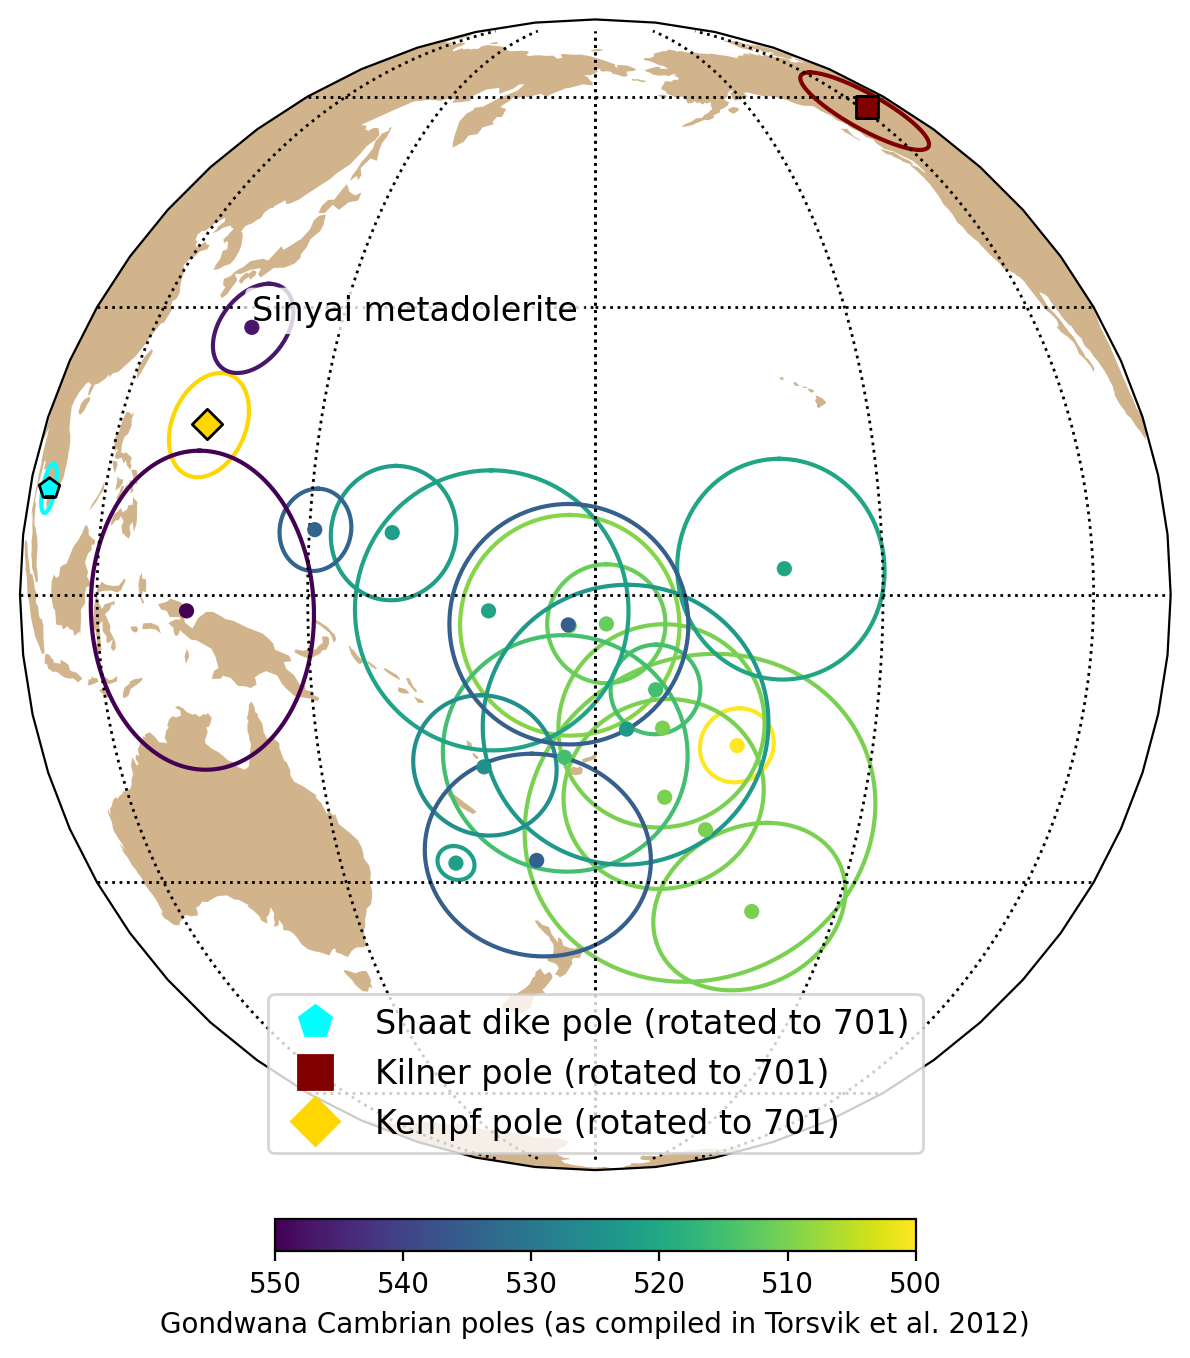

In [20]:
map_axis = ipmag.make_orthographic_map(central_longitude=180,
                                       figsize=(8,8),land_edge_color=None)
ipmag.plot_pole(map_axis, Shaat_plon_rotated, Shaat_plat_rotated, Shaat_A95, 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon_rotated+180, -Kilner_plat_rotated, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon_rotated, Kempf_plat_rotated, Kempf_A95, 
                marker='D',color='gold', markersize=60)

vmin=500
vmax=550
cNorm = colors.Normalize(vmin, vmax)
Gondwana_scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in range(Gondwana_Cambrian_poles.shape[0]):
    rgba = Gondwana_scalarMap.to_rgba(Gondwana_Cambrian_poles['Age'][n])
    hex_color = colors.rgb2hex(rgba)
    ipmag.plot_pole(map_axis,Gondwana_Cambrian_poles['RLon'][n]+180,
                    -Gondwana_Cambrian_poles['RLat'][n],
                    Gondwana_Cambrian_poles['a95'][n],
                    color=hex_color, markersize=30, edgecolor='none')
    
map_axis.text(
    137.6,
    27.7,
    'Sinyai metadolerite',
    transform=ccrs.PlateCarree(),
    fontsize=12,
    color='black',
    ha='left',
    va='bottom',
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.8)
)

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole (rotated to 701)')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole (rotated to 701)')
kempf_pole = mlines.Line2D([], [], color='gold', marker='D', linestyle='None', markersize=12, label='Kempf pole (rotated to 701)')

# Add the legend to the plot
plt.legend(handles=[mean_pole, kilner_pole, kempf_pole], loc='lower center', fontsize=12)
cbar=plt.colorbar(Gondwana_scalarMap, orientation='horizontal', fraction=0.026, pad=0.04)
cbar.set_label('Gondwana Cambrian poles (as compiled in Torsvik et al. 2012)')
cbar.ax.invert_xaxis()

plt.savefig('output/Kempf_Gondwana.pdf', bbox_inches='tight')
plt.show()

The Ayn pole is similar to the Sinyai metadolerite dike pole of Meert and Van der Voo (1996) which is a unit interpreted to be remagnetized during Mozambique Belt metamorphism.
> New paleomagnetic and  age data from the Sinyai metadolerite dike in central Kenya support the suggestion that the eastern portion of Gondwana was assembled during two separate orogenic events. The dike intrudes Mozambique Belt metasediments dated  Ma and was itself metamorphosed to greenschist facies at  Ma. This greenschist-facies event reset the original magnetization in the rocks and occurred over a time span that included at least one field reversal. The paleomagnetic pole at 20°S, 319°E () augments the available paleomagnetic database for Gondwana and suggests that Gondwana assembly was completed by 550 Ma; therefore the concept of a united East Gondwana continent may not be valid for pre-550 Ma time. In our model, the 650-800 Ma East Africa Orogeny resulted from a collision between the Congo craton of East Africa and the IMSLEK terranes (India, Madagascar, Sri Lanka, Enderby Land, and the Kalahari craton). A pervasive granulate-facies metamorphis event at  Ma in parts of East Gondwana, coupled with our paleomagnetic evidence for a united Gondwana at 550 Ma, led to our suggestion of a Kuunga Orogeny at this time. The Kuunga Orogeny results from the collision of Australo-Antarctica with Congo-IMSLEK.

In [21]:
Gondwana_APWP = pd.read_csv('../data/APWP/Torsvik2012a_Gondwana_APWP.csv')
Gondwana_Mesozoic_Cenozoic_APWP = Gondwana_APWP[(Gondwana_APWP['age'] <= 140) & (Gondwana_APWP['age'] >= 0)]
Gondwana_Mesozoic_Cenozoic_APWP.reset_index(drop=True, inplace=True)
Gondwana_Mesozoic_Cenozoic_APWP

,age,N_poles,RM_A95,RM_Plat,RM_Plon,RM_f0_6_A95,RM_f0_6_Plat,RM_f0_6_Plon,Spline_Plat,Spline_Plon,Spline_GCD
0,0,15.0,2.5,-87.1,11.9,2.5,-87.1,11.9,-87.9,65.6,2.4
1,10,26.0,2.6,-85.6,3.6,2.6,-86.5,3.4,-85.1,5.1,1.5
2,20,16.0,3.9,-82.8,7.2,4.3,-85.0,5.1,-84.6,1.9,0.5
3,30,8.0,4.9,-80.0,2.2,6.0,-82.6,353.6,-83.1,346.5,1.1
4,40,8.0,5.6,-75.8,356.8,6.0,-77.9,351.4,-79.1,338.3,2.8
5,50,5.0,7.9,-75.0,2.5,8.4,-76.7,359.5,-77.6,6.4,1.8
6,60,10.0,3.0,-71.0,44.9,3.0,-71.0,44.9,-73.9,35.2,4.2
7,70,11.0,1.7,-69.7,46.3,1.7,-69.7,46.3,-69.7,47.0,0.2
8,80,14.0,2.9,-70.5,53.2,2.9,-70.5,53.2,-70.1,50.6,1.0
9,90,20.0,2.6,-70.3,58.0,2.6,-70.3,58.0,-69.7,58.7,0.6


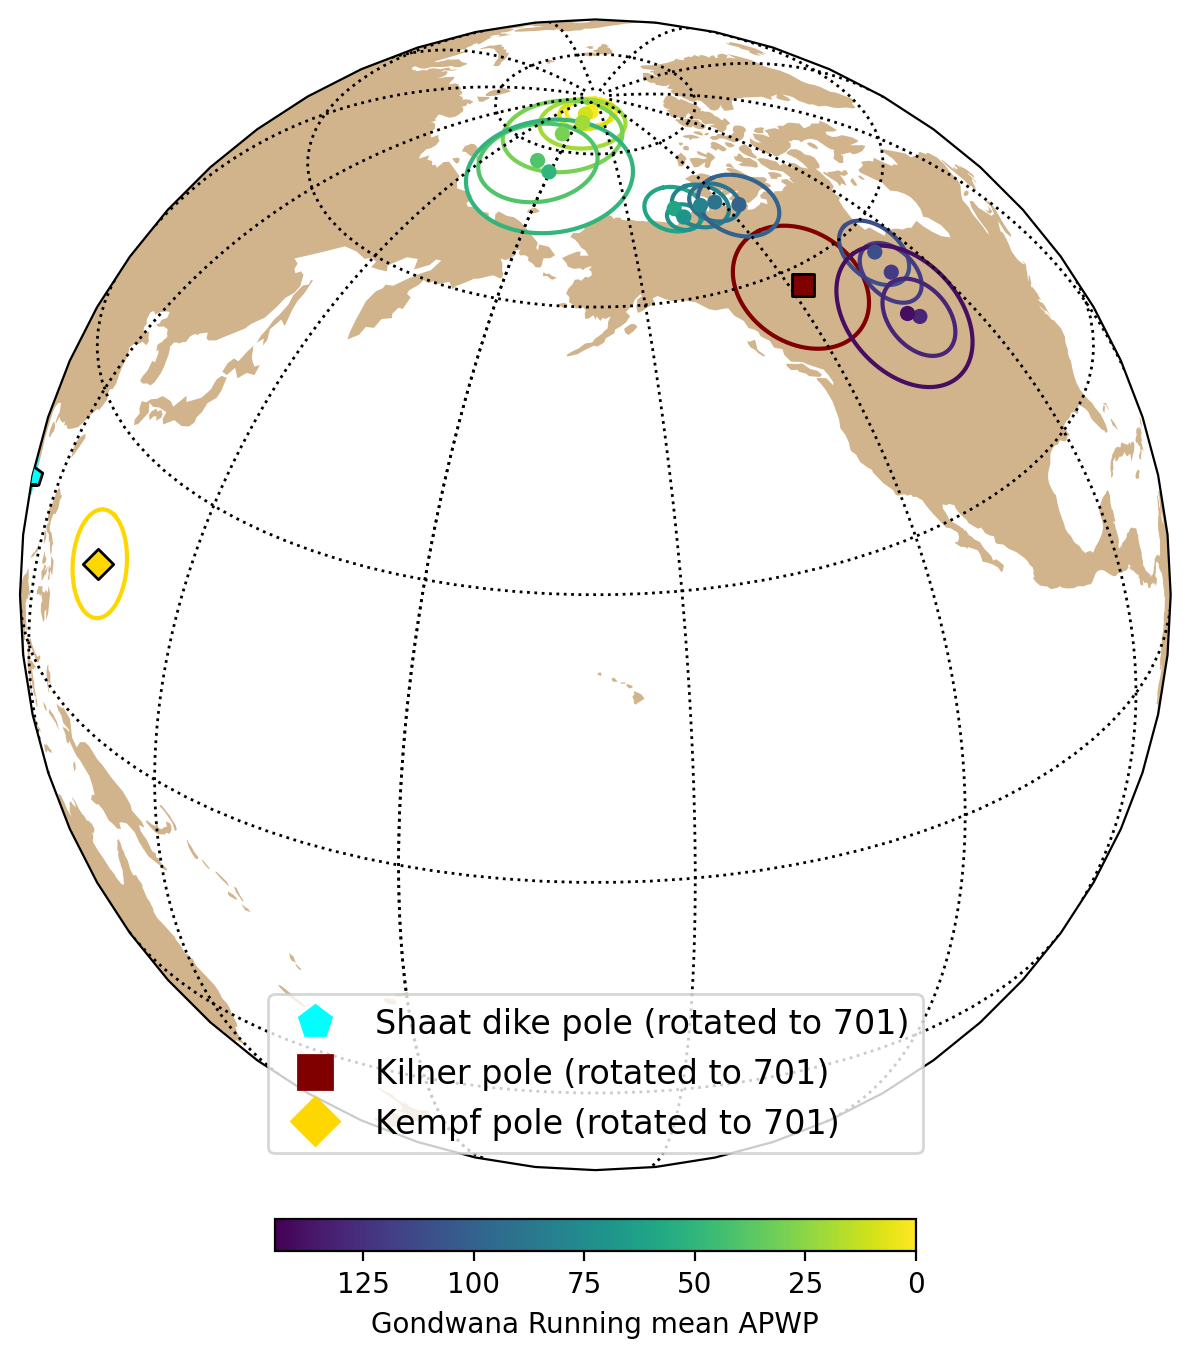

In [22]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30,
                                       figsize=(8,8),land_edge_color=None)
ipmag.plot_pole(map_axis, Shaat_plon_rotated, Shaat_plat_rotated, Shaat_A95, 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon_rotated+180, -Kilner_plat_rotated, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon_rotated, Kempf_plat_rotated, Kempf_A95, 
                marker='D',color='gold', markersize=60)

vmin=0
vmax=145
cNorm = colors.Normalize(vmin, vmax)
Gondwana_scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in range(Gondwana_Mesozoic_Cenozoic_APWP.shape[0]):
    rgba = Gondwana_scalarMap.to_rgba(Gondwana_Mesozoic_Cenozoic_APWP['age'][n])
    hex_color = colors.rgb2hex(rgba)
    ipmag.plot_pole(map_axis,Gondwana_Mesozoic_Cenozoic_APWP['RM_f0_6_Plon'][n]+180,
                    -Gondwana_Mesozoic_Cenozoic_APWP['RM_f0_6_Plat'][n],
                    Gondwana_Mesozoic_Cenozoic_APWP['RM_f0_6_A95'][n],
                    color=hex_color, markersize=30, edgecolor='none')
    

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole (rotated to 701)')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole (rotated to 701)')
kempf_pole = mlines.Line2D([], [], color='gold', marker='D', linestyle='None', markersize=12, label='Kempf pole (rotated to 701)')

# Add the legend to the plot
plt.legend(handles=[mean_pole, kilner_pole, kempf_pole], loc='lower center', fontsize=12)
cbar=plt.colorbar(Gondwana_scalarMap, orientation='horizontal', fraction=0.026, pad=0.04)
cbar.set_label('Gondwana Running mean APWP')
cbar.ax.invert_xaxis()

plt.show()

In [23]:
GAPWP = pd.read_excel('../data/APWP/Vaes_APWP.xlsx',header=2)
GAPWP_Cretaceous = GAPWP[(GAPWP['Age'] <= 145) & (GAPWP['Age'] >= 60)]
GAPWP_Cretaceous.reset_index(drop=True, inplace=True)

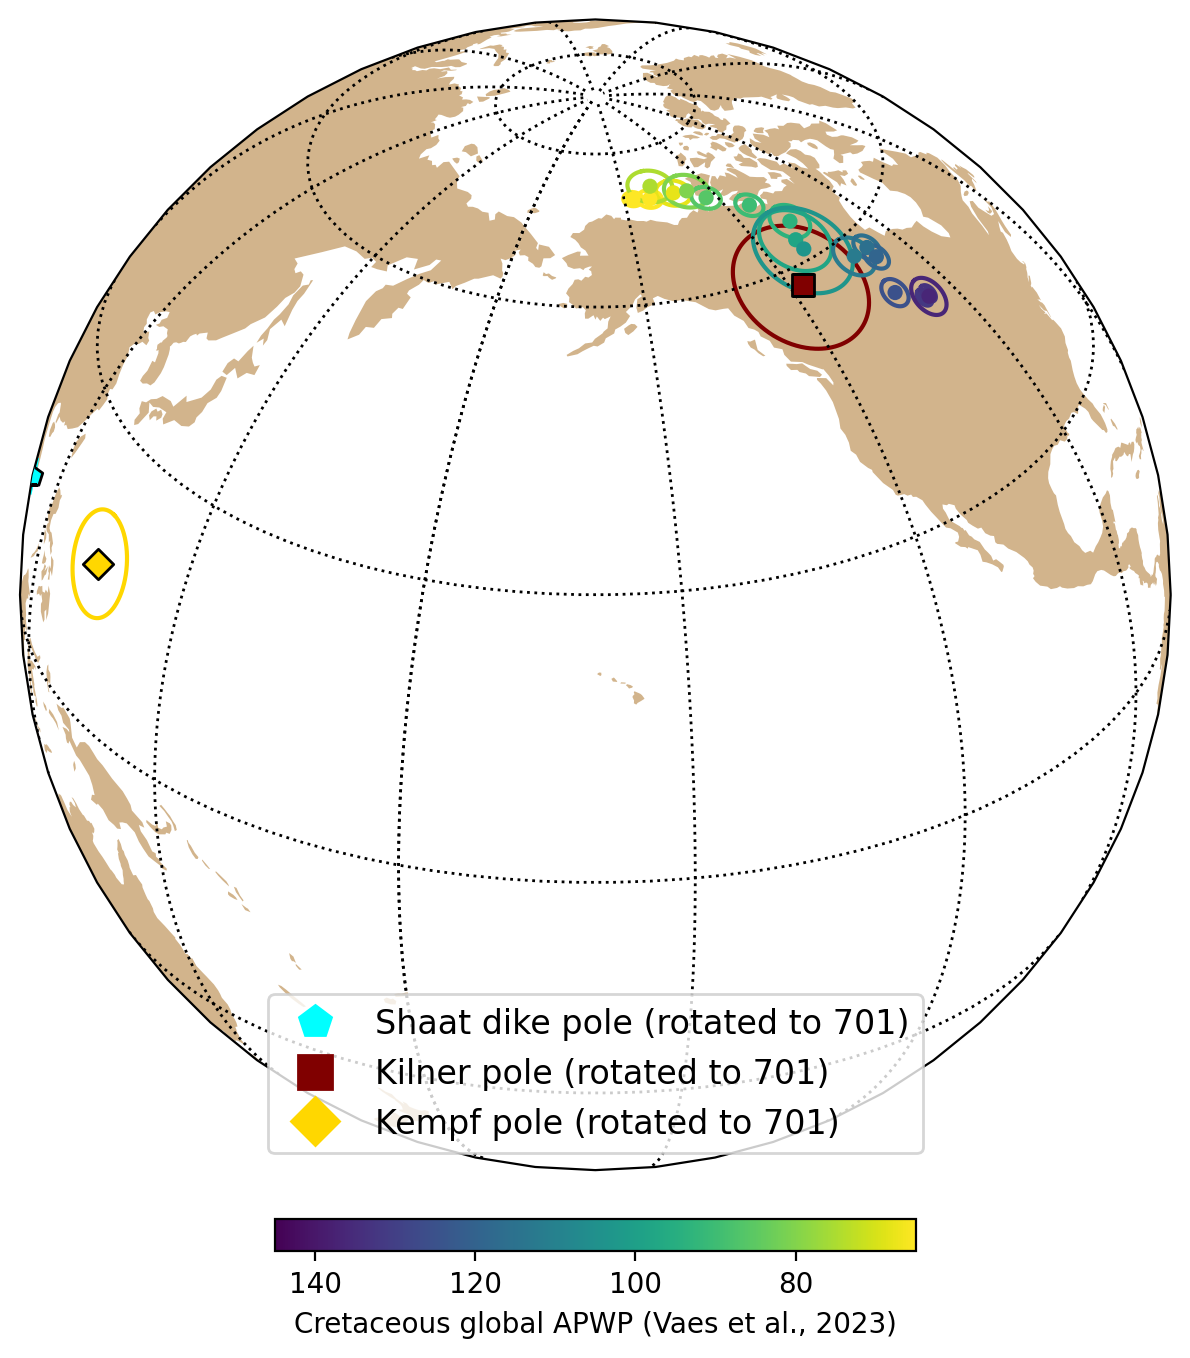

In [24]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30,
                                       figsize=(8,8),land_edge_color=None)
ipmag.plot_pole(map_axis, Shaat_plon_rotated, Shaat_plat_rotated, Shaat_A95, 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon_rotated+180, -Kilner_plat_rotated, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon_rotated, Kempf_plat_rotated, Kempf_A95, 
                marker='D',color='gold', markersize=60)

vmin=65
vmax=145
cNorm = colors.Normalize(vmin, vmax)
Gondwana_scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

APWP_path = GAPWP_Cretaceous

for n in range(APWP_path.shape[0]):
    rgba = Gondwana_scalarMap.to_rgba(APWP_path['Age'][n])
    hex_color = colors.rgb2hex(rgba)
    ipmag.plot_pole(map_axis,APWP_path['Longitude'][n]+180,
                    -APWP_path['Latitude'][n],
                    APWP_path['P95'][n],
                    color=hex_color, markersize=30, edgecolor='none')
    

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole (rotated to 701)')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole (rotated to 701)')
kempf_pole = mlines.Line2D([], [], color='gold', marker='D', linestyle='None', markersize=12, label='Kempf pole (rotated to 701)')

# Add the legend to the plot
plt.legend(handles=[mean_pole, kilner_pole, kempf_pole], loc='lower center', fontsize=12)
cbar=plt.colorbar(Gondwana_scalarMap, orientation='horizontal', fraction=0.026, pad=0.04)
cbar.set_label('Cretaceous global APWP (Vaes et al., 2023)')
cbar.ax.invert_xaxis()

plt.savefig('output/Kilner_Cretaceous_APWP.pdf', bbox_inches='tight')
plt.show()

### Nantuo pole

the published Nantuo pole of _9.3 165.9_ does not incorporate inclination shallowing. The pole can be adjusted to implement f=0.6 using this code (recognizing that there is uncertainty associated with the actual f-factor that should lead to elongation between the unflattened pole and such a flattened pole)

In [25]:
site_lat = 28.5
site_lon = 109.8

pole_lat = 9.3
pole_lon = 165.9

di = pmag.vgp_di(pole_lat,pole_lon,site_lat,site_lon)
dec = di[0]
inc = di[1]

inc_0_6 = ipmag.unsquish(inc,0.6)

pole_corrected = pmag.dia_vgp(dec, inc_0_6, 1, site_lat, site_lon)
pole_lon_corrected = pole_corrected[0]
pole_lat_corrected = pole_corrected[1]
print(pole_lon_corrected,pole_lat_corrected)

152.78020612171647 15.80093536776213


In [26]:
Kilner_plat = -52.38
Kilner_plon = 74.48
Kilner_A95 = 7.3
Kilner_pole_Mirbat_dec, Kilner_pole_Mirbat_inc = pmag.vgp_di(Kilner_plat,Kilner_plon,Mirbat_area_lat,Mirbat_area_lon)
Kilner_dec_difference = Kilner_pole_Mirbat_dec - SD_sites_Leger_all_mag_tc_unified_mean['dec']

print('The difference in declination between the Shaat dikes and Kilner pole is: ' + str(round(Kilner_dec_difference,0)))


The difference in declination between the Shaat dikes and Kilner pole is: 87.0


Sparse paleomagnetic data from 10 specimens of the Cryogenian Ayn Formation developed by \cite{Kempf2000a} near our conglomerate test locality yielded a hematite-held direction with a similar declination to the Shaat dikes. The inclination is substantially shallower indicating a paleolatitude of $\sim$9\textdegree\ (or 10 to 22\textdegree\ if a range of typical inclination shallowing is applied; \citealp{Pierce2022a})

From Kempf et al.
> Two sites (10 samples) revealed a consistent magnetic component above 500³C. The sample mean declination of 68.4º and inclination of 18.4º (k =46.4, K95 =7.2º)

Table 2 reports pole of plon 141.8; plat 23.3; dp 3.9; dm 7.5